In [418]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import math 

df = pd.read_csv('ex2data2.txt')
df.head(3) 

,microchip_test_1,microchip_test_2,accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1


## Note
Did not normalize this data as it worked better without normalizing.

If we wanted to normalize , 
```python
df['x1'] = (df['microchip_test_1'] - df['microchip_test_1'].mean() )/ df['microchip_test_1'].std()
df['x2'] = (df['microchip_test_2'] - df['microchip_test_2'].mean() )/ df['microchip_test_2'].std()
```


In [419]:
df['x1'] = df['microchip_test_1']
df['x2'] = df['microchip_test_2']
df.head(3)

,microchip_test_1,microchip_test_2,accepted,x1,x2
0,0.051267,0.69956,1,0.051267,0.69956
1,-0.092742,0.68494,1,-0.092742,0.68494
2,-0.213710,0.69225,1,-0.213710,0.69225


In [420]:
Ex_1 = np.array(df['x1'])
Ex_2 = np.array(df['x2'])
choice = np.array(df['accepted'])

m = len(Ex_1)

Adm_ex_1 = []
Adm_ex_2 = []
n_Adm_ex_1 = []
n_Adm_ex_2 = []

for i in range(len(Ex_1)):
    if choice[i]==1:
        Adm_ex_1.append(Ex_1[i])
        Adm_ex_2.append(Ex_2[i])
    else :
        n_Adm_ex_1.append(Ex_1[i])
        n_Adm_ex_2.append(Ex_2[i])

(-0.86974, 1.2089)

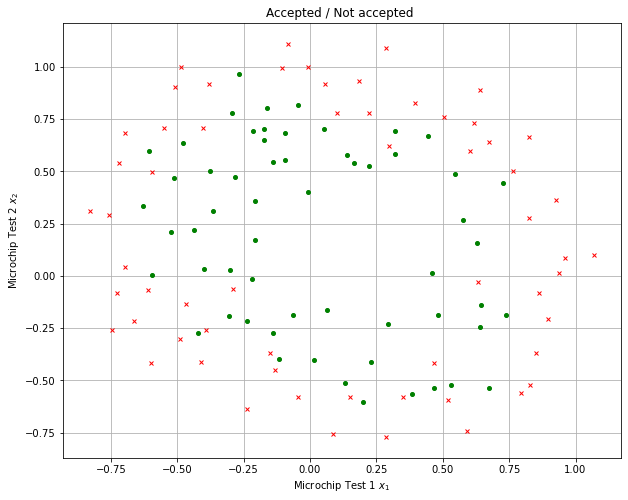

In [421]:
plt.figure(figsize=(10,8))
plt.grid(True)
plt.title('Accepted / Not accepted ')
plt.xlabel('Microchip Test 1 $ x_1 $')
plt.ylabel('Microchip Test 2 $ x_2 $')
plt.plot(Adm_ex_1,Adm_ex_2,'o' , color = 'green',markersize=4 , label='Accepted')
plt.plot(n_Adm_ex_1,n_Adm_ex_2,'rx' , color = 'red' , markersize = 4,label = 'Not Accepted')
plt.xlim(df['x1'].min() - 0.1 , df['x1'].max() + 0.1)
plt.ylim(df['x2'].min() - 0.1 , df['x2'].max() + 0.1)
# plt.legend() 
# - np.sqrt(3.0**2 - xvals**2 )

### Feature mapping

One way to fit the data better is to create more features from each data
point. In the provided function *mapFeature()*, we will map the features into
all polynomial terms of $x_1$ and $x_2$ up to the sixth power.

In [422]:
## got this function from a repo , used for feature mapping
def mapFeature( x1col, x2col ):
    """ 
    Function that takes in a column of n- x1's, a column of n- x2s, and builds
    a n- x 28-dim matrix of featuers as described in the homework assignment
    """
    degrees = 6
    out = np.ones( (x1col.shape[0], 1) )

    for i in range(1, degrees+1):
        for j in range(0, i+1):
            term1 = x1col ** (i-j)
            term2 = x2col ** (j)
            term  = (term1 * term2).reshape( term1.shape[0], 1 ) 
            out   = np.hstack(( out, term ))
    return out


In [423]:
y = np.array(df['accepted'])
mappedX = mapFeature(np.array(df['x1']),np.array(df['x2']))
mappedX 

array([[ 1.00000000e+00,  5.12670000e-02,  6.99560000e-01, ...,
         6.29470940e-04,  8.58939846e-03,  1.17205992e-01],
       [ 1.00000000e+00, -9.27420000e-02,  6.84940000e-01, ...,
         1.89305413e-03, -1.39810280e-02,  1.03255971e-01],
       [ 1.00000000e+00, -2.13710000e-01,  6.92250000e-01, ...,
         1.04882142e-02, -3.39734512e-02,  1.10046893e-01],
       ...,
       [ 1.00000000e+00, -4.84450000e-01,  9.99270000e-01, ...,
         2.34007252e-01, -4.82684337e-01,  9.95627986e-01],
       [ 1.00000000e+00, -6.33640000e-03,  9.99270000e-01, ...,
         4.00328554e-05, -6.31330588e-03,  9.95627986e-01],
       [ 1.00000000e+00,  6.32650000e-01, -3.06120000e-02, ...,
         3.51474517e-07, -1.70067777e-08,  8.22905998e-10]])

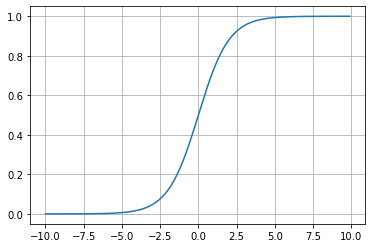

In [424]:
def sigmoid(z):
    return 1/(1+(math.e**-z))
x = np.arange(-10,10,0.1)
plt.plot(x,sigmoid(x))
plt.grid(True)

In [425]:
initial_theta = np.zeros((mappedX.shape[1],1))

def hyp(theta,X):
    return sigmoid(np.dot(X,theta))

def cost_function(theta,X_h,y_h,mylambda = 0.):
    fp =  np.dot(y_h.T,np.log(hyp(theta,X_h)))
    sp =   np.dot((1 - y_h).T,np.log(1 - hyp(theta,X_h)))
    return float(-np.sum(fp+sp)/m) + (mylambda/m)*(theta*theta).sum()/2
    
cost_function(initial_theta,mappedX,y,mylambda=0)

0.6931471805599453

In [426]:
def gr_ds(theta, X,y,epochs_h,alpha_h = 0.1,lamda = 0.):
    theta_v = theta
    cost_func_graph = []
    
    for _ in range(epochs_h):
        theta_v = theta_v - alpha_h*np.dot(hyp(theta_v,X).T - y.T ,X ).T/m - lamda*alpha*theta_v/m 
        cost_func_graph.append(cost_function(theta_v,X,y))
    
    return theta_v,cost_func_graph

In [427]:
theta ,l = gr_ds(initial_theta,mappedX,y,epochs_h=20000,lamda=1)
print(cost_function(theta,mappedX,y)) 

0.6215912941059805


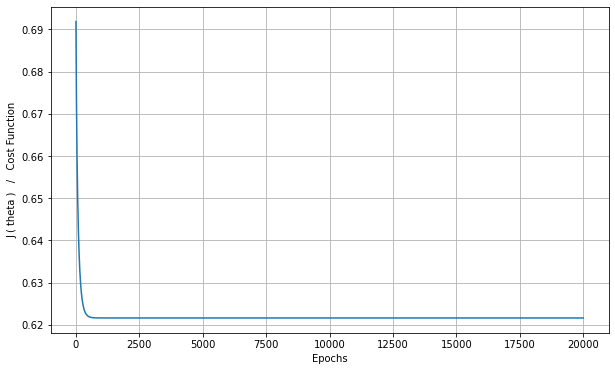

In [428]:
plt.figure(figsize=(10,6))
plt.plot([i for i in range(20000)],l) 
plt.xlabel("Epochs")
plt.ylabel("J ( theta )   /   Cost Function")
plt.grid(True)

In [429]:
## got function to plot from repo 

def plotBoundary(mytheta, myX, myy, epochs,mylambda=0.,alpha = 0.1):
    """
    Function to plot the decision boundary for arbitrary theta, X, y, lambda value
    Inside of this function is feature mapping, and the minimization routine.
    It works by making a grid of x1 ("xvals") and x2 ("yvals") points,
    And for each, computing whether the hypothesis classifies that point as
    True or False. Then, a contour is drawn with a built-in pyplot function.
    """
    e = epochs 
    theta_, mincost = gr_ds(mytheta,myX,myy,lamda=mylambda , epochs_h = e,alpha_h = alpha)
    xvals = np.linspace(-2,2,50)
    yvals = np.linspace(-2,2,50)
    zvals = np.zeros((len(xvals),len(yvals)))
    for i in range(len(xvals)):
        for j in range(len(yvals)):
            myfeaturesij = mapFeature(np.array([xvals[i]]),np.array([yvals[j]]))
            zvals[i][j] = np.dot(theta_.T,myfeaturesij.T)
    zvals = zvals.transpose()

    u, v = np.meshgrid( xvals, yvals )
    mycontour = plt.contour( xvals, yvals, zvals, [0])
    #Kind of a hacky way to display a text on top of the decision boundary
    myfmt = { 0:'Lambda = %d'%mylambda}
    plt.clabel(mycontour, inline=1)
    plt.title(fr"Epochs =  {e} , $\alpha = {alpha}$ , $\lambda$ = {mylambda}")

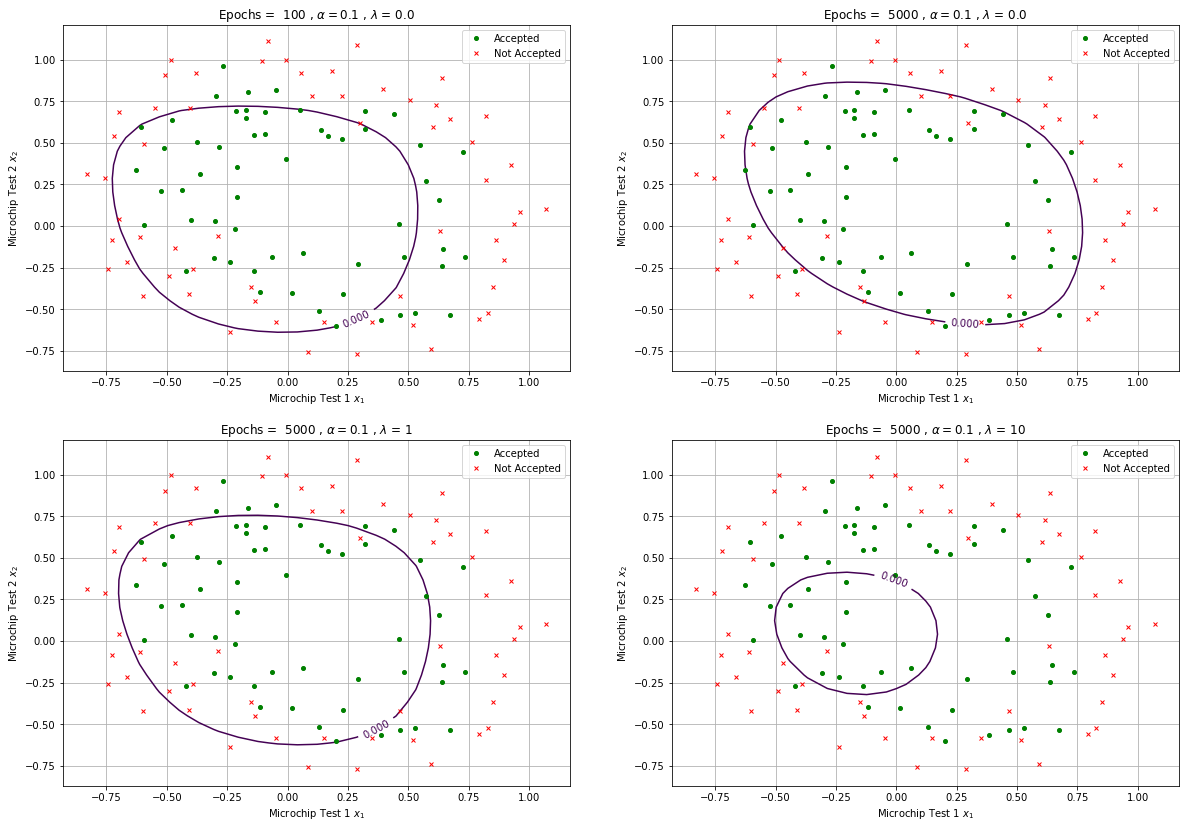

In [430]:
plt.figure(figsize=(20,14))

plt.subplot(2,2,1)
plt.grid(True)
plt.xlabel('Microchip Test 1 $ x_1 $')
plt.ylabel('Microchip Test 2 $ x_2 $')
plt.plot(Adm_ex_1,Adm_ex_2,'o' , color = 'green',markersize=4 , label='Accepted')
plt.plot(n_Adm_ex_1,n_Adm_ex_2,'rx' , color = 'red' , markersize = 4,label = 'Not Accepted')
plt.xlim(df['x1'].min() - 0.1 , df['x1'].max() + 0.1)
plt.ylim(df['x2'].min() - 0.1 , df['x2'].max() + 0.1)
plt.legend() 
plotBoundary(initial_theta,mappedX,y,epochs = 100)

plt.subplot(2,2,2)
plt.grid(True)
plt.xlabel('Microchip Test 1 $ x_1 $')
plt.ylabel('Microchip Test 2 $ x_2 $')
plt.plot(Adm_ex_1,Adm_ex_2,'o' , color = 'green',markersize=4 , label='Accepted')
plt.plot(n_Adm_ex_1,n_Adm_ex_2,'rx' , color = 'red' , markersize = 4,label = 'Not Accepted')
plt.xlim(df['x1'].min() - 0.1 , df['x1'].max() + 0.1)
plt.ylim(df['x2'].min() - 0.1 , df['x2'].max() + 0.1)
plt.legend()
plotBoundary(initial_theta,mappedX,y,epochs=5000)

plt.subplot(2,2,3)
plt.grid(True)
plt.xlabel('Microchip Test 1 $ x_1 $')
plt.ylabel('Microchip Test 2 $ x_2 $')
plt.plot(Adm_ex_1,Adm_ex_2,'o' , color = 'green',markersize=4 , label='Accepted')
plt.plot(n_Adm_ex_1,n_Adm_ex_2,'rx' , color = 'red' , markersize = 4,label = 'Not Accepted')
plt.xlim(df['x1'].min() - 0.1 , df['x1'].max() + 0.1)
plt.ylim(df['x2'].min() - 0.1 , df['x2'].max() + 0.1)
plt.legend() 
plotBoundary(initial_theta,mappedX,y,epochs = 5000,mylambda = 1) 


plt.subplot(2,2,4)
plt.grid(True)
plt.xlabel('Microchip Test 1 $ x_1 $')
plt.ylabel('Microchip Test 2 $ x_2 $')
plt.plot(Adm_ex_1,Adm_ex_2,'o' , color = 'green',markersize=4 , label='Accepted')
plt.plot(n_Adm_ex_1,n_Adm_ex_2,'rx' , color = 'red' , markersize = 4,label = 'Not Accepted')
plt.xlim(df['x1'].min() - 0.1 , df['x1'].max() + 0.1)
plt.ylim(df['x2'].min() - 0.1 , df['x2'].max() + 0.1)
plt.legend() 
plotBoundary(initial_theta,mappedX,y,epochs = 5000,mylambda=10)
